## Project Applying Statistics

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from statsmodels.stats.proportion import proportions_ztest
import re as re
sns.set_style(style="darkgrid")
%matplotlib inline


### Common Functions for this Project

In [239]:
def convert_to_int64(columns, df):
    for column in columns:
        df[column] = df[column].astype('int64')

In [ ]:
def convert_to_category(columns, df):
    for column in columns:
        df[column] = df[column].astype('int64')

## PART - A

### 1. Given: Contigency table for Product A
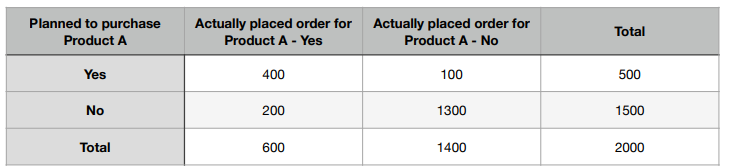

##### 1A. The joint probability of the people who planned to purchase and actually placed an order

##### P(PLANNING-A and PLACED-A)

In [240]:
p_plan_and_purchase = 400/2000
print(p_plan_and_purchase)

0.2


#### 1B.  find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

##### P(PLANNING-A and PLACED-A | PLANNING-A)

In [241]:
p_plan_and_purchase_given_planning = (400/2000)/(500/2000)
print(p_plan_and_purchase_given_planning)

0.8


### 2. Random quality check in electical manufacturing company

### N = 10
### Failure rate = 0.05

### Use binomial distribution 

#####  2.A. Probability that none of the items are defective?

In [242]:
n = 10
p = .05 # 5% Failure rate gives 95% success

k = np.arange(0,n+1)
binomial = stats.binom.pmf(k,n,p)
# print(binomial)
print(f"Probability that zero item to be defective is {binomial[0]:.5f}")

Probability that zero item to be defective is 0.59874


#### 2.B. Probability that exactly one of the items is defective? 

In [243]:
print(f"Probability for exactly 1 item to be defective is {binomial[1]:.5f}")

Probability for exactly 1 item to be defective is 0.31512


#### 2.C. Probability that two or fewer of the items are defective?

In [244]:
print(f"Probability for 2 or fewer to be defective is {(binomial[0]+binomial[1]+binomial[2]):.5f}")

Probability for 2 or fewer to be defective is 0.98850


#### 2.D. Probability that three or more of the items are defective ?

In [245]:
p_three_more=float(0)
for data in binomial[3:]:
    p_three_more += data

print(f"Probability for 3 or more to be defective is {p_three_more:.5f}")

Probability for 3 or more to be defective is 0.01150


### 3. A car salesman sells on an average 3 cars per week. 

### Lambda = 3 (rate per week)
### N = 6 (Assumed number of working days in car selling company per week)

### Use Poisson distribution

##### 3.A. What is Probability that in a given week he will sell some cars?


In [10]:
n = 6
rate = 3

k = np.arange(0,7)

poisson = stats.poisson.pmf(k,rate)
poisson

print(f"Probability that in a given week he will sell some cars is {1-poisson[0]}")

Probability that in a given week he will sell some cars is 0.950212931632136


##### 3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?

In [247]:
two_or_more_less_than_5 = float(0)
for car in poisson[2:5]:
    two_or_more_less_than_5 += car
print(f"Probability of selling 2 or more but less than 5 cars is {two_or_more_less_than_5}")

Probability of selling 2 or more but less than 5 cars is 0.6161149710523164


##### 3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.

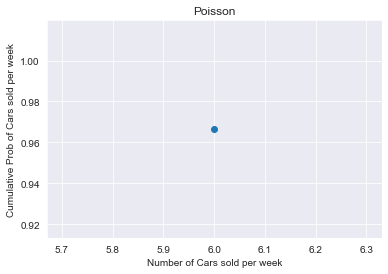

In [5]:
# One came from Greatlearning as feedback

#poisson = stats.poisson.cdf(n,rate) 
#plt.plot(n,poisson, 'o-')
##plt.title('Poisson') 
#plt.xlabel('Number of Cars sold per week') 
#plt.ylabel('Cumulative Prob of Cars sold per week') 
#plt.show()

[0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881
 0.05040941]
[0.04978707 0.19914827 0.42319008 0.64723189 0.81526324 0.91608206
 0.96649146]


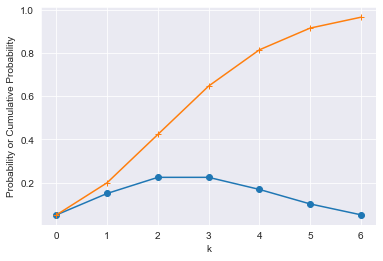

In [11]:
plt.plot(k, poisson, marker='o')
plt.xlabel('K')
#plt.ylabel('Probability')


print(poisson)
cumulative_posson = stats.poisson.cdf(k,3)

plt.plot(k, cumulative_posson, marker='+')
plt.xlabel('k')
plt.ylabel('Probability or Cumulative Probability')
print(cumulative_posson)

plt.show()

### 4.  Speech based bot at a restaurant X

### Success Rate  =  86.8%

### N = 3 (3 Independant orders)

### Use binomial distribution

##### 4.A What is the probability that all three orders will be recognised correctly?

In [249]:
n = 3
p = 0.868

k = np.arange(0,n+1)
restaurant_binomial = stats.binom.pmf(k,n,p)
#print(restaurant_binomial)
print(f"Probability to recognize all three orders {restaurant_binomial[3]:.5f}")

Probability to recognize all three orders 0.65397


##### 4.B What is the probability that none of the three orders will be recognised correctly? 

In [250]:
print(f"Probability to recognize none of the orders {restaurant_binomial[0]:.5f}")

Probability to recognize none of the orders 0.00230


##### 4.C What is the probability that at least two of the three orders will be recognised correctly?

In [251]:
print(f"Probability to recognize atleast 2 orders {restaurant_binomial[2] + restaurant_binomial[3]:.5f}")

Probability to recognize atleast 2 orders 0.95233


### 5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use what we learned ?

### With the pandamic coming and going - office (need not to be IT) would like to open for employee and customers.  It is important management to make sure they take care of all protection measure are followed in the environment is clean. The statistics and machine learning can be used to ensure people wear mask via image recognization and verify them at the entrance, check temparature, etc.

## PART - B

## PROJECT OBJECTIVE: Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on  the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

### 1. Clean up Basketball

##### We have import in the top. We can just start loading basketball data to finish the part - B in the project.
##### Step - 1:
##### A. Read the file into dataframe and collect data type information
##### B. Describe the datafrom to get Discriptive Statistics Information
##### C. Peak into data

In [252]:
bb_data = pd.read_csv("DS+-+Part2+-+Basketball.csv")

In [253]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


##### NOTE:

###### The result of data type is not meeting our expecation. We are expecting all column to be Number where as we are seeing them as Object. The Team column can be Object as we are expecting this to be a 'name of the team'

In [254]:
bb_data.describe(include="all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


##### We do see many NaN (Not an Number) which we need to fix first

In [255]:
bb_data.shape

(61, 13)

In [256]:
bb_data

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


##### There are column like Torunament, Runner-up, TorunamentChampion is having value like hypen or underscore. Also the TeamLaunch is not having one unique format to represent year of the launch.

##### Step - 2: Check, Is there a null or NA column 

In [257]:
bb_data.isnull().any()

Team                   False
Tournament             False
Score                  False
PlayedGames            False
WonGames               False
DrawnGames             False
LostGames              False
BasketScored           False
BasketGiven            False
TournamentChampion     False
Runner-up              False
TeamLaunch             False
HighestPositionHeld    False
dtype: bool

##### Step - 3: Check whether Team column has any duplicate as we are expecting it to be unique. Remove if there are duplicates

In [258]:
bb_data.Team.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Name: Team, Length: 61, dtype: bool

##### Step - 4: Remove hypen with zero and correct the team launch column to have one launch year.
#####                Convert all object datatype as Int64 to get the size and speed advantage.

In [259]:
bb_data.replace('-',0,inplace=True)

In [260]:
data = bb_data['TeamLaunch'].str.extract(r'^(\d{4})')
data.astype('int64')
bb_data['TeamLaunch'] = bb_data['TeamLaunch'].str.extract(r'^(\d{4})')

In [261]:
# All integer column in dataframe 
#
# TODO - Dynamically get this in python ?
int64_column = ['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven',
                'TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld', 'Tournament']

In [262]:
sys.getsizeof(bb_data['Score'])

3781

In [263]:
convert_to_int64(int64_column,bb_data)

In [264]:
sys.getsizeof(bb_data['Score'])

632

In [265]:
bb_data.info()
bb_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15


##### Step - 5: We don't want team which has not played any games - Remove those records
#####                We can also remove records where PlayedGames are not equal to sum of WonGames, DrawnGames, LostGames.

In [266]:
df = bb_data[bb_data.select_dtypes(include=np.number).ge(0).all(1)]
df

indexNames = df[ df['PlayedGames'] <= 0 ].index
print(indexNames)
df.drop(indexNames , inplace=True)
indexNames = df[ df['PlayedGames'] != (df['WonGames'] + df['DrawnGames'] + df['LostGames']) ].index
print(indexNames)
df.drop(indexNames , inplace=True)
df

Int64Index([60], dtype='int64')
Int64Index([22], dtype='int64')


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


In [267]:
df.describe(include='all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
unique,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Team 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.508475,920.762712,812.779661,311.067797,192.830508,308.881356,1166.118644,1160.440678,1.474576,1.457627,1957.627119,7.033898
std,NaN,27.097762,1147.619776,884.749781,411.681031,203.635675,297.036227,1524.126218,1173.900164,5.559571,4.610042,26.756822,5.359381
min,NaN,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.000000,0.000000,1929.000000,1.000000
25%,NaN,4.000000,101.500000,115.000000,34.500000,25.500000,62.500000,154.000000,231.000000,0.000000,0.000000,1934.500000,3.000000
50%,NaN,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1950.000000,6.000000
75%,NaN,40.000000,1370.000000,1373.000000,439.500000,333.000000,564.000000,1697.500000,2051.500000,0.000000,0.000000,1977.500000,10.000000


##### 75% of data in TorunamentChampion and Runner-up series is zero
##### 75% of data in HighestPositionHeld is under 10
##### The oldest team was launched in the year of 1929 and new team is 2016

### 2. Analyse the data

<AxesSubplot:>

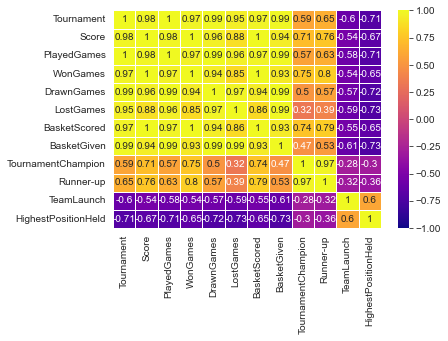

In [268]:
sns.heatmap(df.corr(), cmap="plasma", vmin=-1, vmax=1, annot=True, linewidth=1)

##### TeamLaunch and HighestPositionHeld looks like an independant variables. It doesn't have any correlation with any other variable.
##### 
##### High Correlation with - 100%
#####     Torunament vs PlayedGames
#####     WonGames vs Score
#####     BasketScored vs Score
#####     BasketScored vs WonGames
##### High Correlation with 99%
#####     Tournament vs (DrawnGames & BasketGiven)
#####     PlayedGames vs (DrawnGames & BaskedGiven)
#####     DrawnGames vs (TOrunament & PlayedGames & BasketGiven)
#####     LostGames vs (BaskedGiven)

##### Drop TeamLaunch and HighestPositionHeld

In [269]:
df2 = df.drop(columns=['TeamLaunch','HighestPositionHeld'])

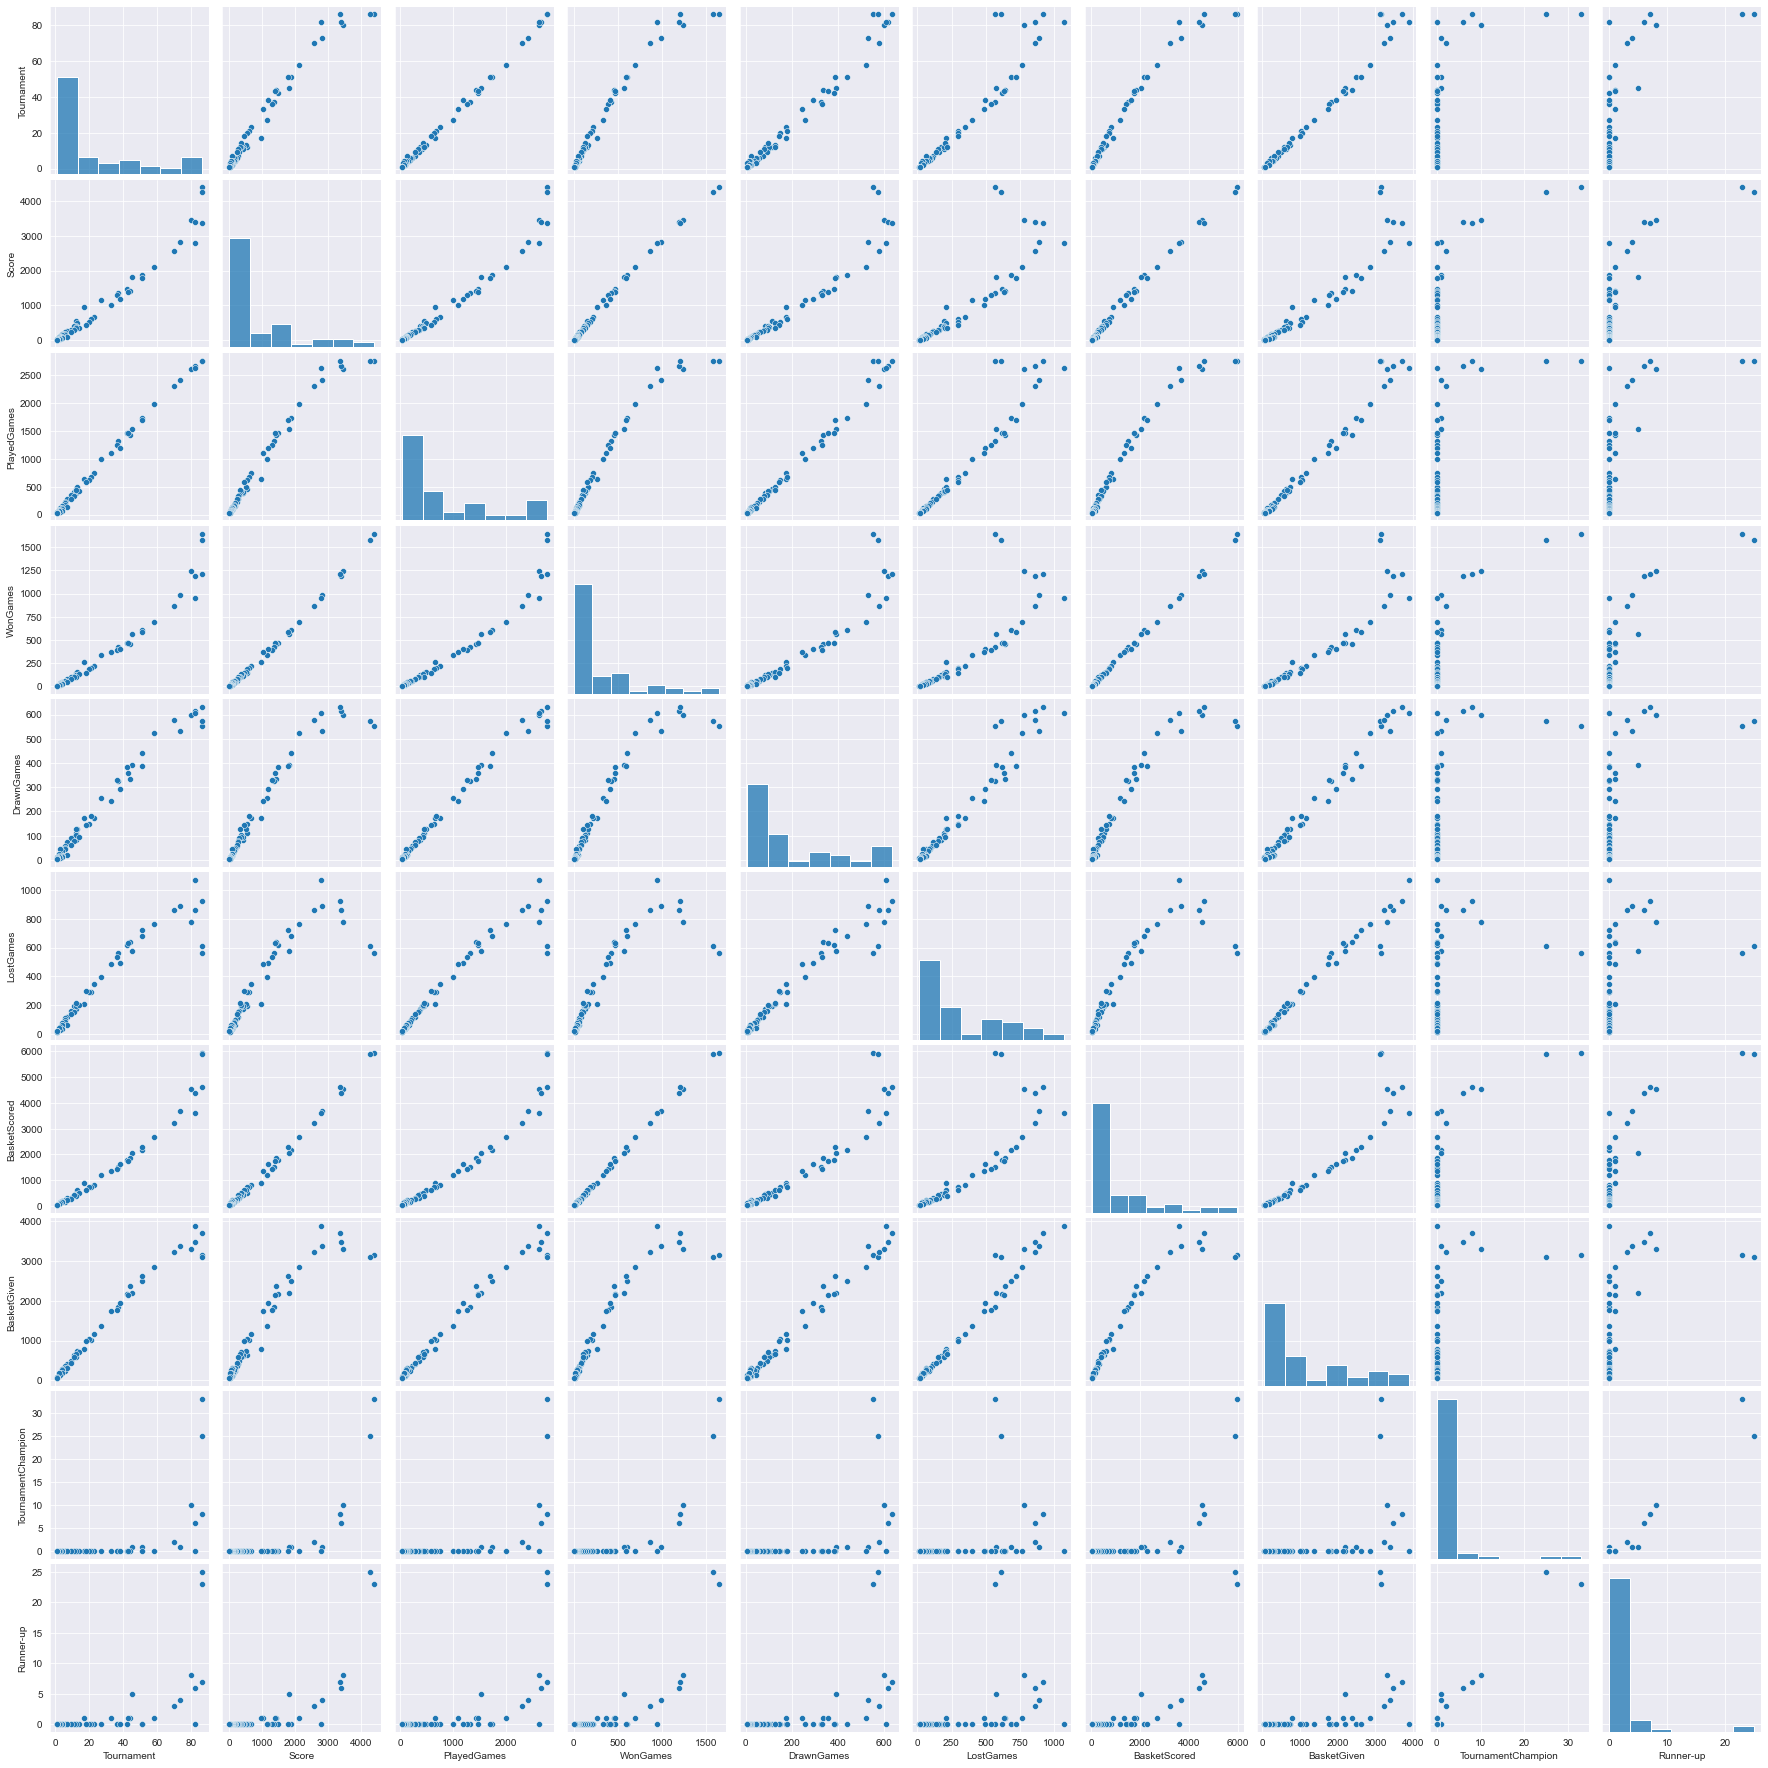

In [270]:
sns.pairplot(df2)

##### One can see the strong correlation of the fields in the above view as well. The TournamentChampion and Runner-up series are not having high corrlation - otherwise rest of the series are having high correlation

<AxesSubplot:>

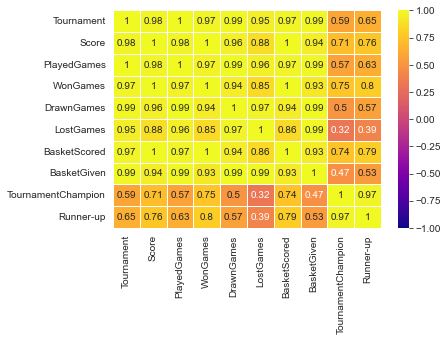

In [271]:
sns.heatmap(df2.corr(), cmap="plasma", vmin=-1, vmax=1, annot=True, linewidth=1)

In [272]:
#print(df['TeamLaunch'].count())
array = df['TeamLaunch'].unique()
unique, counts = np.unique(df['TeamLaunch'], return_counts=True)
print(unique, " and ", counts)

[1929 1930 1931 1932 1933 1934 1935 1939 1940 1941 1943 1944 1945 1947
 1948 1949 1950 1951 1953 1955 1956 1959 1960 1961 1962 1963 1971 1974
 1977 1978 1979 1987 1990 1991 1994 1995 1996 1998 1999 2004 2007 2009
 2014 2016]  and  [10  1  1  1  1  1  2  2  1  3  1  1  1  1  1  1  1  2  1  1  1  1  1  1
  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


<AxesSubplot:xlabel='Score', ylabel='Count'>

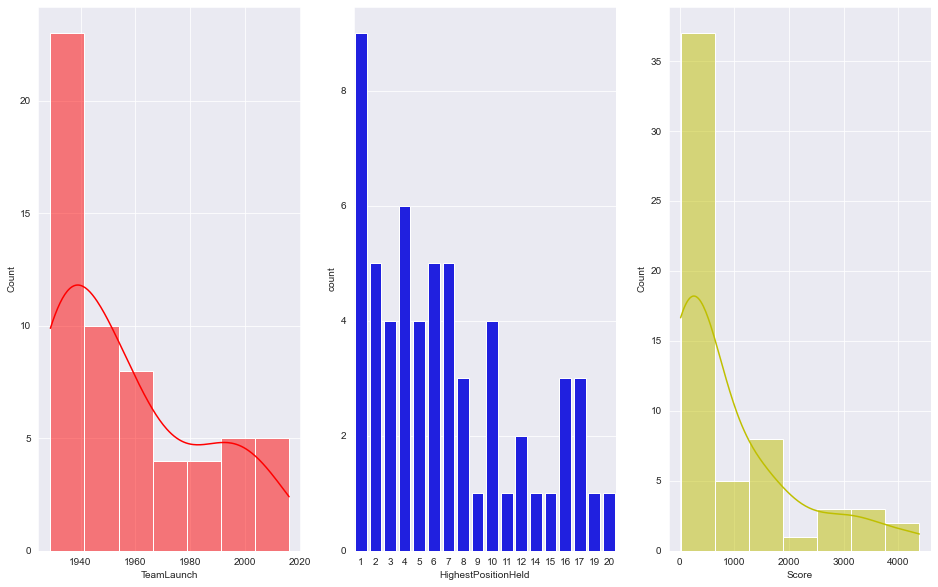

In [273]:
fig, axes = plt.subplots(1,3,figsize=(16,10))
sns.histplot(df['TeamLaunch'], kde=True, ax=axes[0], color='r')
sns.countplot(x=df['HighestPositionHeld'], ax=axes[1], color='b')
sns.histplot(x=df['Score'], kde=True, ax=axes[2], color='y')



#####  Above diagram will give visual representation of the previous statement about TeamLaunch and HighestPositionHeld 
#####
#####  Also it indicates that ~70% team have score around 10000


<AxesSubplot:xlabel='Runner-up', ylabel='Count'>

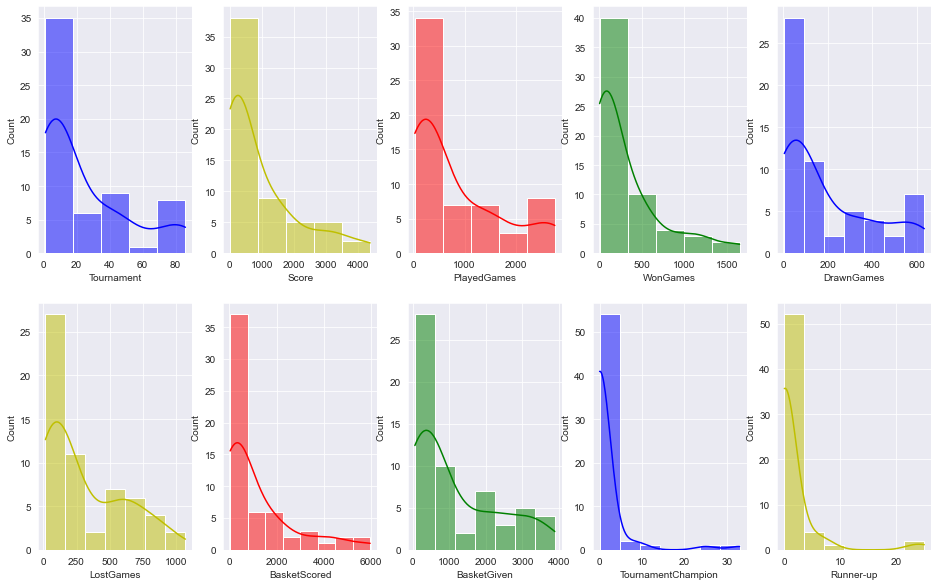

In [274]:
fig, axes = plt.subplots(2,5,figsize=(16,10))

#'Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven',
                #'TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld', 'Torunament'

sns.histplot(df['Tournament'], kde=True, ax=axes[0,0], color='b',bins=5)
sns.histplot(df['Score'], kde=True,  ax=axes[0,1], color='y',bins=5)
sns.histplot(df['PlayedGames'], kde=True,  ax=axes[0,2], color='r', bins=5)
sns.histplot(df['WonGames'], kde=True,  ax=axes[0,3], color='g',bins=5)
sns.histplot(df['DrawnGames'], kde=True,  ax=axes[0,4], color='b')
sns.histplot(df['LostGames'], kde=True,  ax=axes[1,0], color='y')
sns.histplot(df['BasketScored'], kde=True,  ax=axes[1,1], color='r')
sns.histplot(df['BasketGiven'], kde=True,  ax=axes[1,2], color='g')
sns.histplot(df['TournamentChampion'], kde=True,  ax=axes[1,3], color='b')
sns.histplot(df['Runner-up'], kde=True,  ax=axes[1,4], color='y')


##### Most of the column in baketball csv is right skewed. 
##### 
##### There are only very few team (<10) become either champion or runner up
##### The team won 1000+ games are very around 7
##### The team which played more than 2000 games are around 8


<AxesSubplot:xlabel='Runner-up'>

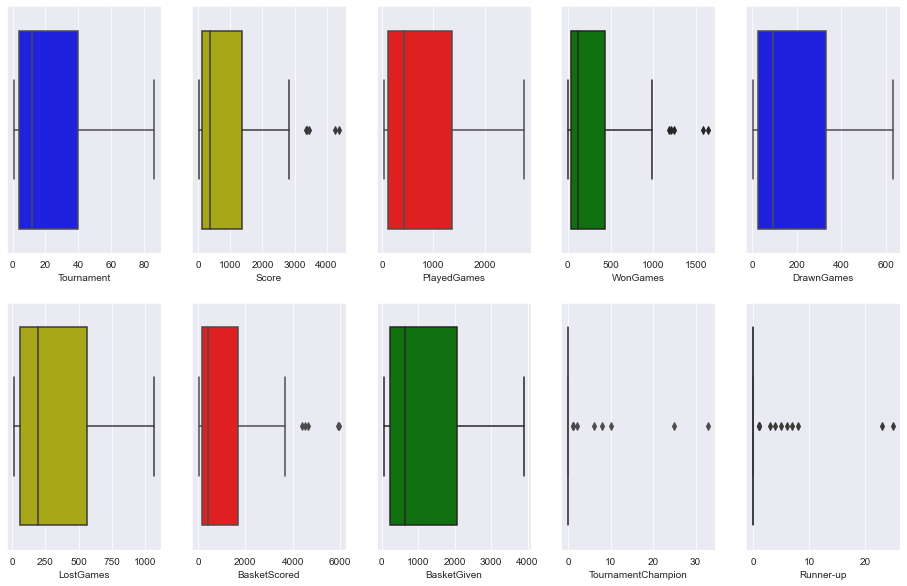

In [275]:
fig, axes = plt.subplots(2,5,figsize=(16,10))

#sns.boxplot(x=df['TournamentChampion'],ax=axes[0]);
#sns.boxplot(x=df['Runner-up'],ax=axes[1]);


sns.boxplot(x=df['Tournament'],  ax=axes[0,0], color='b')
sns.boxplot(x=df['Score'], ax=axes[0,1], color='y')
sns.boxplot(x=df['PlayedGames'],  ax=axes[0,2], color='r')
sns.boxplot(x=df['WonGames'], ax=axes[0,3], color='g')
sns.boxplot(x=df['DrawnGames'], ax=axes[0,4], color='b')
sns.boxplot(x=df['LostGames'],  ax=axes[1,0], color='y')
sns.boxplot(x=df['BasketScored'],  ax=axes[1,1], color='r')
sns.boxplot(x=df['BasketGiven'],  ax=axes[1,2], color='g')
sns.boxplot(x=df['TournamentChampion'],ax=axes[1,3], color='b')
sns.boxplot(x=df['Runner-up'],  ax=axes[1,4], color='y')


##### The TorunamentChampion and Runner-up shows lot of outlier

##### In the below frame we will create a group between Tournament, TournamentChampion,Runner-up with Team. Ignore if (Tournament) is zero or  (TorunamentChampion and Runner-up) is zero

In [276]:
df3 = df[(df['TournamentChampion'] != 0) | (df['Runner-up'] != 0)]
df3


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1


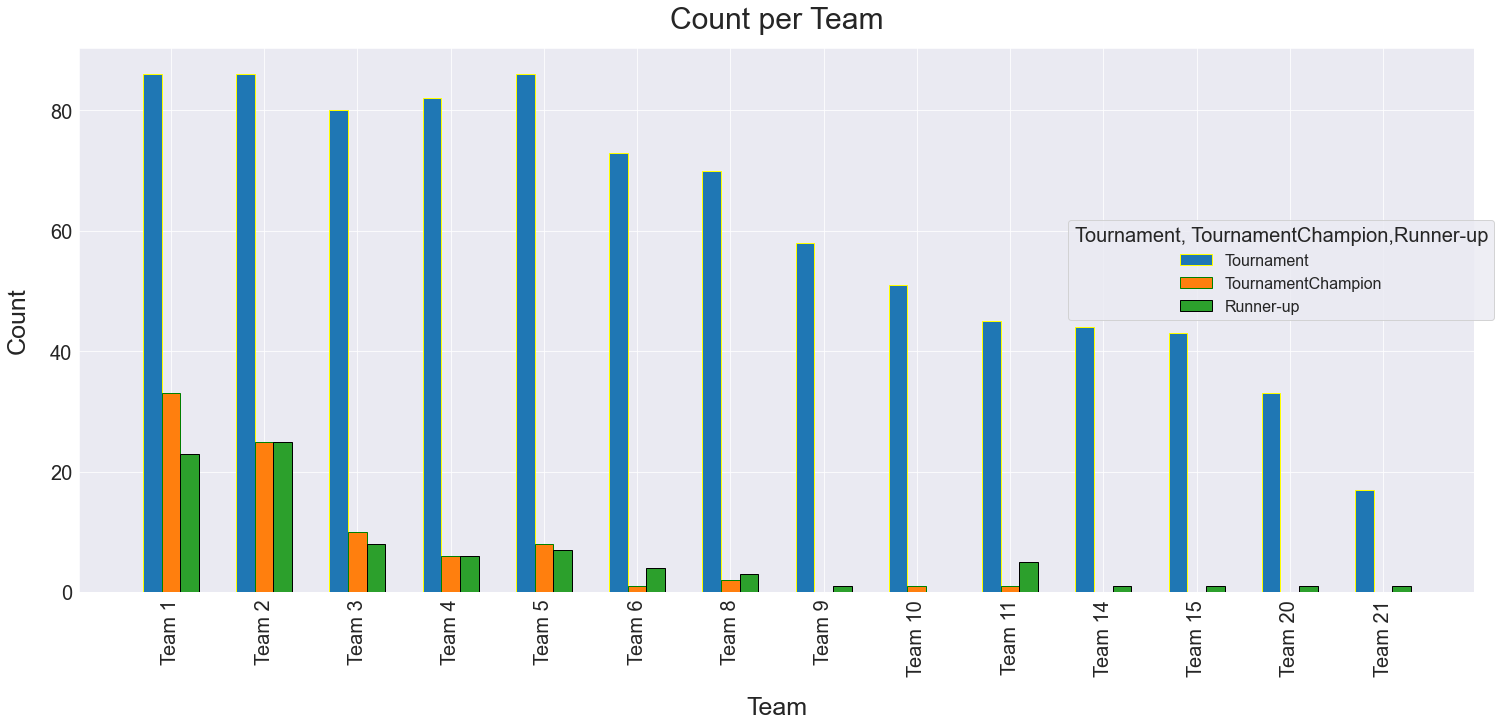

In [277]:
#fig, axes = plt.subplots(1,2,figsize=(36,20))

#sns.barplot(x='Score', y='WonGames', data=df, ax=axes[0])
#sns.barplot(x='PlayedGames', y='Tournament', data=df, ax=axes[1])
#sns.stripplot(x='Tournament', y='PlayedGames', data=df, ax=axes[1])
#plt.plot(sorted(df['Tournament']),label='T', color='g')
#plt.plot(sorted(df['TournamentChampion']), label='1st', color='r')
#plt.plot(sorted(df['Runner-up']), label='2nd', color='b')
#new_df = df.groupby(df['Tournament'], df['TournamentChampion'], df['Runner-up'])
#print(new_df)
#candidates_by_month = df.groupby('Tournament').agg(num_cand_month = ('num_candidates', 'sum'))
#print(candidates_by_month)
#for team in df['Team']:
#    print(df[]

#df.loc[df['Tournament'] != 95]

# https://towardsdatascience.com/easy-grouped-bar-charts-in-python-b6161cdd563d

#create the base axis
fig, ax = plt.subplots(1,1, figsize = (25,10))

label = df3['Team']
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              df3['Tournament'],
              width = width, 
               label = 'Tournament',
               edgecolor = "yellow")
#create the second bar using x
rect2 = ax.bar(x,
              df3['TournamentChampion'],
              width = width,
              label = 'TournamentChampion',
              edgecolor = "green")
#create the third bar plus 1 width
rects2 = ax.bar(x + width,
               df3['Runner-up'],
               width = width,
               label = 'Runner-up',
               edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("Count",
             fontsize = 25,
             labelpad = 20)
ax.set_xlabel("Team",
             fontsize = 25,
             labelpad =20)
ax.set_title("Count per Team",
            fontsize = 30,
            pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "Tournament, TournamentChampion,Runner-up",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
              labelsize = 20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)

##### Team -3 won better than Team -5 though both team have almost played on the same set of torunament. 
##### Team -10 has only one win
##### Team -6, Team -8, Team -11 has came runner-up ~3+ times. Team -11 played only 3/4th of the torunament compared with Team -6, Team -8
##### Team -14, Team -15, Team -20, Team -21 has become runner up ~1+ times
##### Team -1, > Team -2 > Team -4 > Team-5 : They played 80+ torunaments but team - 2 won/runner-up manier times than Team -4 and Team - 5. Team - 1 has won many tournaments and almost equally drawn the games like Team-2

##### Like the above graph construct plot for PlayedGames,WonGames,DrawnGames,LostGames

In [278]:
df4 = df[(df['WonGames'] > df['LostGames']) | (df['DrawnGames'] > df['LostGames'])]
df4


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2


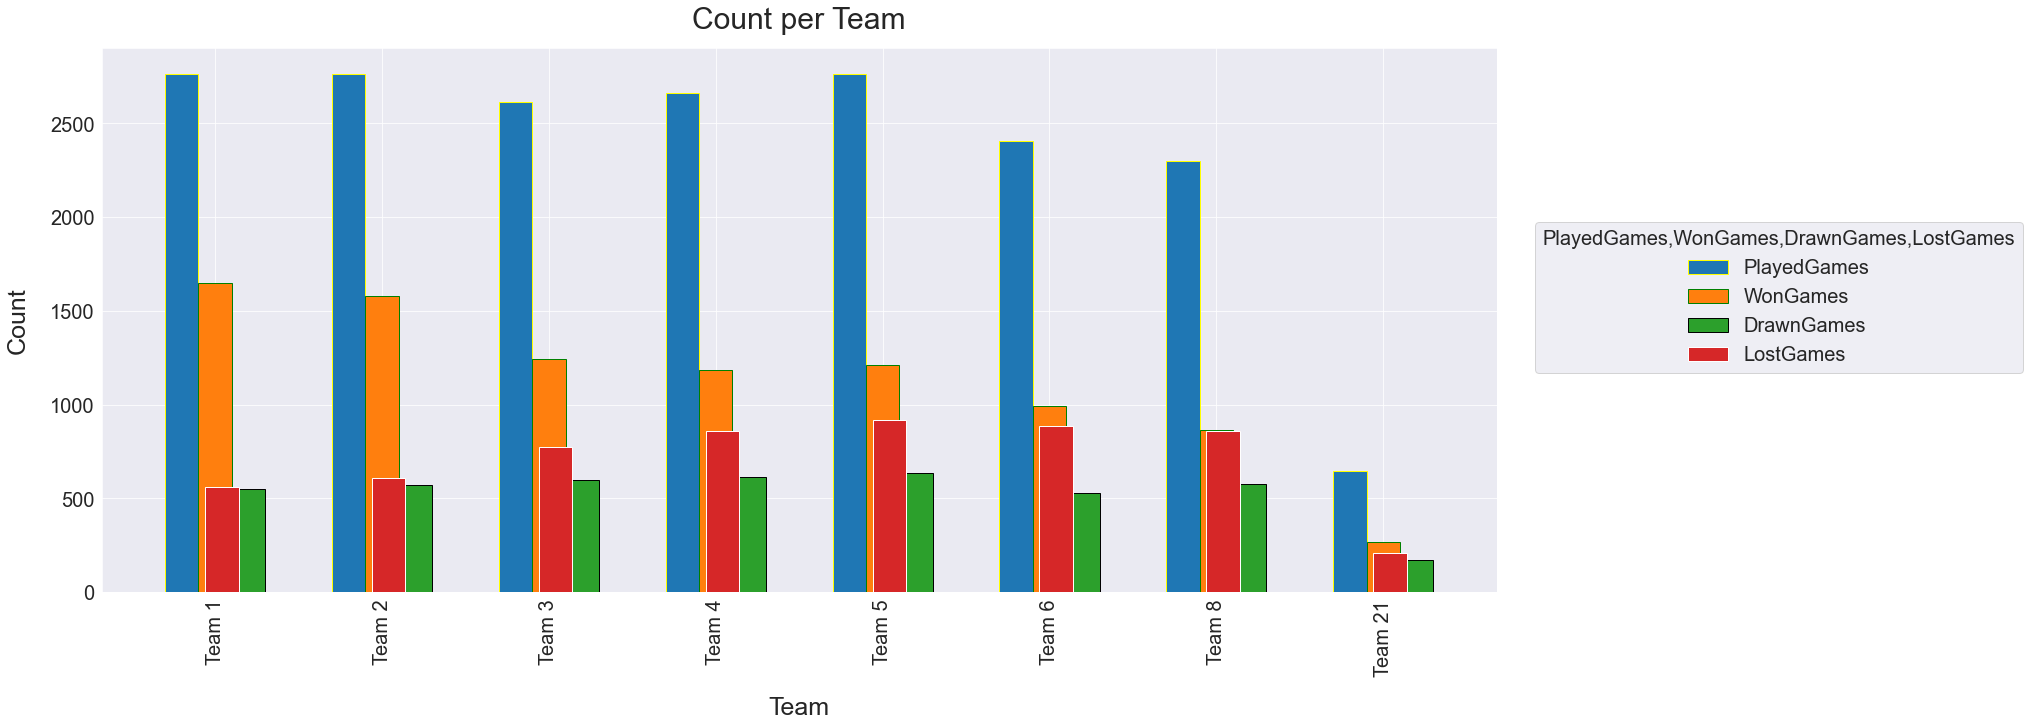

In [279]:
fig, ax = plt.subplots(1,1, figsize = (25,10))

label = df4['Team']
x = np.arange(len(label))
#set the width of the bars
width = 0.2
#create the first bar -1 width
rect1 = ax.bar(x - width,
              df4['PlayedGames'],
              width = width, 
               label = 'PlayedGames',
               edgecolor = "yellow")
#create the second bar using x
rect2 = ax.bar(x,
              df4['WonGames'],
              width = width,
              label = 'WonGames',
              edgecolor = "green")
#create the third bar plus 1 width
rects2 = ax.bar(x + width, df4['DrawnGames'], width = width, label = 'DrawnGames',
               edgecolor = "black")
rects2 = ax.bar(x + (width * width), df4['LostGames'], width = width, label = 'LostGames', edgecolor = "white")
#add the labels to the axis
ax.set_ylabel("Count", fontsize = 25, labelpad = 20)
ax.set_xlabel("Team", fontsize = 25, labelpad =20)
ax.set_title("Count per Team", fontsize = 30, pad = 20)
#set the ticks
#using the labels
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
ax.legend(title = "PlayedGames,WonGames,DrawnGames,LostGames", fontsize = 20, title_fontsize = 20,bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x", which = "both", labelrotation = 90, labelsize = 20)
ax.tick_params(axis = "y", which = "both", labelsize = 20)

##### Team -1, Team -2, Team -3 Team -4, Team -5 played more than 2.5K games
##### Team -6, Team -8 played 2.2K games
##### Team -21 played 600+ games and won 250+ games and drawn about 150+ games. They lost ~150 games only

In [280]:
df4['Percentage'] = df4['PlayedGames'] / (df4['WonGames'] + df4['DrawnGames'])*100
df4.sort_values('Percentage',ascending=False)

C:\Users\MSS\AppData\Local\Temp/ipykernel_36480/615084920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Percentage'] = df4['PlayedGames'] / (df4['WonGames'] + df4['DrawnGames'])*100


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Percentage
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,159.750173
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,158.316897
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,149.945711
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,147.753744
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,147.488584
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,142.142469
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,128.226555
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,125.602547


##### The team - 8, Team -6 has more percentage of Win and Drawn games than others.
##### The tram -1 and Team -2 is low win percentage
##### Other teams like 3, 4, 5 and 21 is win 140+ percentage  

In [281]:
#df5 = df[(df['BasketScored'] - df['BasketGiven'])]
#df5
#df5['difference'] = (df['BasketScored'] - df['BasketGiven'])/df['Tournament']
#df5
#df4.sort_values('Percentage',ascending=False)

##### If we compare BasketScored vs BasketGiven, Team-1 and Team-2 have scored difference average is ~32. They have score more than given score as team
##### Team - 6 and 21 is showing lesser difference meaning they allowed oponent to score equal to them
##### Team - 3, 4 and 5 standing in the middle.

### 3. Any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future. At-least 1 suggestion for each point.

#### 1. The Sporta Domain and almost all team Sports are required to have right set of players and their experience. Even though we select team based on the scores/points/games won, etc we can't be sure that they will remain same when we start switching players across the team.

#### 2. During Data clean up we have seen following,
#####     a. The dataset is not complete meaning a Team - 23 is given with more number of PlayedGames with out any result. 
#####     b. The Team-61 doesn't have any information
#####     c. Many team don't have TournamentChampion and Runner-up column filled in.

#### 3. The HighestPositionHeld is not much of a use as we could not derive consistency or any other useful metrics from the column.

#### 4. The amount of data given is not sufficient. In fact when we start applying filter such as Team was a TorunamentChampion vs Runner-up or PlayedGames, WonGames, etc or Scored vs Given we are noticing the data goes to less than 10 team which will not be sufficient. 
 
#### 5. The column like Score, WonGames, BaskedScored, TorunamentChampion, Runner-up shows lot of outliers.

#### 6. There is no Team categorisation or grouping of team data is available.. It can help analyse and provide more insight about the team.

## PART - C

## Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online.


#### 1. Read the CSV file

In [282]:
startup_xdata = pd.read_csv("DS+-+Part3+-+CompanyX_EU.csv")
startup_xdata

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


#### 2.A. Check the datatypes of each attribute

In [283]:
startup_xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


#### 2.B. Check for null values in the attributes

In [284]:
startup_xdata.isnull().any()

Startup           False
Product            True
Funding            True
Event             False
Result            False
OperatingState    False
dtype: bool

In [285]:
startup_xdata.shape

(662, 6)

#### 3.A. Drop the null values.

In [286]:
df1 = startup_xdata.dropna()
df1.shape

(446, 6)

In [287]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         446 non-null    object
 1   Product         446 non-null    object
 2   Funding         446 non-null    object
 3   Event           446 non-null    object
 4   Result          446 non-null    object
 5   OperatingState  446 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


#### 3.B. Convert the ‘Funding’ features to a numerical value.
###### df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))


In [288]:
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

E:\Software\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [289]:
df1

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


#### 3.C. Plot box plot for funds in million.

<AxesSubplot:xlabel='Funds_in_million'>

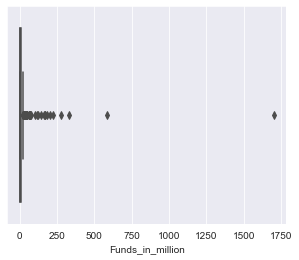

In [290]:
fig, axes = plt.subplots(1,1,figsize=(5,4))

sns.boxplot(x=df1['Funds_in_million'],  color='r')


#### 3.D. Check the number of outliers greater than the upper fence.

In [291]:
Q1 = np.percentile(df1['Funds_in_million'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df1['Funds_in_million'], 75, interpolation = 'midpoint') 
upper_limit = Q3 + (1.5 * (Q3 - Q1))
outlier_count = int(0)
for x in df1['Funds_in_million']:
    if (x > upper_limit):
        outlier_count += 1
        
print(f"The outliers greater than the upper limit {upper_limit} is {outlier_count}")

The outliers greater than the upper limit 22.506749999999997 is 60


#### 3.E. Check frequency of the OperatingState features classes. 

['Closed' 'Operating' 'Acquired' 'Ipo']


<AxesSubplot:xlabel='OperatingState', ylabel='Count'>

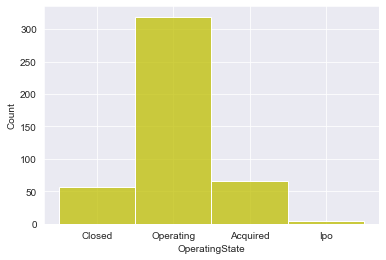

In [292]:
print(df1['OperatingState'].unique())
fig, axes = plt.subplots(1,1,figsize=(6,4))
sns.histplot(x=df1['OperatingState'], color='y')

#### 4.A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 

##### Find out Mean Difference.

##### Use T-Test to find Statistically difference

##### Use Standard 

In [293]:
print(df1[df1['OperatingState'] == 'Closed']['Funds_in_million'].mean())
print(df1[df1['OperatingState'] == 'Operating']['Funds_in_million'].mean())


fund_value_in_closed_state=df1[df1['OperatingState']=='Closed']['Funds_in_million'].values.tolist()
fund_value_in_operating_state=df1[df1['OperatingState']=='Operating']['Funds_in_million'].values.tolist()

#print(fund_value_in_closed_state)
ttest_value=stats.ttest_ind(fund_value_in_closed_state,fund_value_in_operating_state)
print(ttest_value)


3.2581701754385963
19.062185579937324
Ttest_indResult(statistic=-1.1382924515740138, pvalue=0.25572701885629406)


#### 4.B. Write the null hypothesis and alternative hypothesis. 

##### H0: Fund Value in Closed State as same  as Fund Value in Operating State
##### Ha: Fund Value in Closed State is not equal as Fund Value in Operating State

#### 4.C. Test for significance and conclusion 

In [294]:
significance=0.05
if(ttest_value[1] < alpha):
    print('fund_value_in_closed_state different from fund_value_in_operating_state - Reject null Hypothesis')
else:
    print('fund_value_in_closed_state not different from fund_value_in_operating_state - Do not reject null Hypothesis')

fund_value_in_closed_state not different from fund_value_in_operating_state - Do not reject null Hypothesis


#### 4.D. Make a copy of the original data frame. 

In [295]:
df2 = startup_xdata.copy()
df2

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


#### 4.E. Check frequency distribution of Result variables.

In [296]:
df2['Result'].value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

#### 4.F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [297]:
df3 = df1[((df1['Result'] == "Winner") | (df1['Result'] == "Contestant")) & (df1['OperatingState'] == "Operating")]
df3['Funds_in_million'].pct_change()

10            NaN
13      -0.444444
14      -0.250000
15      -0.976133
16     647.044693
          ...    
649     27.888889
650      0.076923
654      1.217857
657     -0.871176
659     26.875000
Name: Funds_in_million, Length: 232, dtype: float64

#### 4.G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: 

##### H0 - Two proportions are the same => Companies_operating[winners] = Companies_operating[Contestants]
##### Ha - Two proportions are not Same => Companies_operating[winners] != Companies_operating[Contestants]

#### 4.H. Test for significance and conclusion

In [298]:
t1_count = len(df1[(df1['Result'] == "Winner") & (df1['OperatingState'] == "Operating")])
t2_count = len(df1[(df1['Result'] == "Contestant") & (df1['OperatingState'] == "Operating")])
significance=0.05
count = t1_count
nobs = t1_count + t2_count
#nobs = len(df1)
print(count, " ", nobs)
stat, pval = proportions_ztest(count, nobs, significance)
print('{0:0.3f}'.format(pval))
if(pval < alpha):
    print('Reject H0')
else:
    print('Do not Reject H0')

18   232
0.116
Do not Reject H0


#### 4.I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards. 

In [299]:
print("Original Event list ", df1['Event'].unique())

# We are handling upto 2013 to 2099
def check_year(text):
    result = re.findall(r"\b(20[1-9][3-9])\b",text)
    if not result:
        return ""
    else:
        return text

print("Event has Disrupt with 2013 onwards", df1[df1['Event'].str.contains('Disrupt')]['Event'].apply(lambda x: check_year(x)).unique())

Original Event list  ['Disrupt NYC 2013' 'Disrupt NY 2016' 'TC50 2009' 'Disrupt Beijing 2011'
 'Hardware Battlefield 2014' 'TC50 2008' 'Disrupt SF 2015'
 'Disrupt London 2016' 'Disrupt NYC 2014' 'Disrupt SF 2012'
 'Disrupt SF 2011' 'TC40 2007' 'Disrupt NYC 2010' 'Disrupt NYC 2012'
 'Disrupt EU 2013' 'Disrupt NYC 2011' 'Disrupt SF 2010' 'Disrupt SF 2014'
 'Disrupt SF 2013' 'Disrupt NY 2015' 'Disrupt SF 2016' '-'
 'Hardware Battlefield 2015' 'Hardware Battlefield 2016'
 'Disrupt London 2015' 'Disrupt EU 2014']
Event has Disrupt with 2013 onwards ['Disrupt NYC 2013' 'Disrupt NY 2016' '' 'Disrupt SF 2015'
 'Disrupt London 2016' 'Disrupt NYC 2014' 'Disrupt EU 2013'
 'Disrupt SF 2014' 'Disrupt SF 2013' 'Disrupt NY 2015' 'Disrupt SF 2016'
 'Disrupt London 2015' 'Disrupt EU 2014']
